<a href="https://colab.research.google.com/github/Arka1212/Netflix-Movies-And-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [95]:
# IMPORTING NECESSARY LIBRARIES.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.stats import norm
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel

import warnings
warnings.filterwarnings("ignore")

In [2]:
# MOUNTING THE DRIVE.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# COPYING PATH.
path = '/content/drive/MyDrive/Capstone Projects/Unsupervised Machine Learning/Netflix movies & TV shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(path)

In [4]:
df.head()

# Glimpse of first 5 rows of dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

# Glimpse of last 5 rows of dataset.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
# SHAPE OF DATASET.
df.shape

# Rows = 7787 & Columns = 12

(7787, 12)

In [7]:
# COLUMNS.
df.columns 

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
# DATASET INFORMATION.
df.info()

# Seems that there are some null or missing values in the dataset.
# Almost all the columns are categorical except the 'release_year' column which is the only one column having int64 data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
# NULL VALUE INSPECTION.
df.isnull().sum()

# 2389 null values are present in 'director' column.
# 718 null values are present in 'cast' column.
# 507 null values are present in 'country' column.
# 10 null values are present in 'date_added' column.
# 7 null values are present in 'rating' column.

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# NULL RATE.
for col in df.columns:
  null_rate = ((df[col].isna().sum())/len(df))*100
  if null_rate > 0:
    print("'{}' null rate ------> {}%".format(col,round(null_rate,2)))

# Null rate for 'director' column is 30.68%.
# Null rate for 'cast' column is 9.22%.
# Null rate for 'country' column is 6.51%.
# Null rate for 'date_added' column is 0.13%.
# Null rate for 'rating' column is 0.09%.

'director' null rate ------> 30.68%
'cast' null rate ------> 9.22%
'country' null rate ------> 6.51%
'date_added' null rate ------> 0.13%
'rating' null rate ------> 0.09%


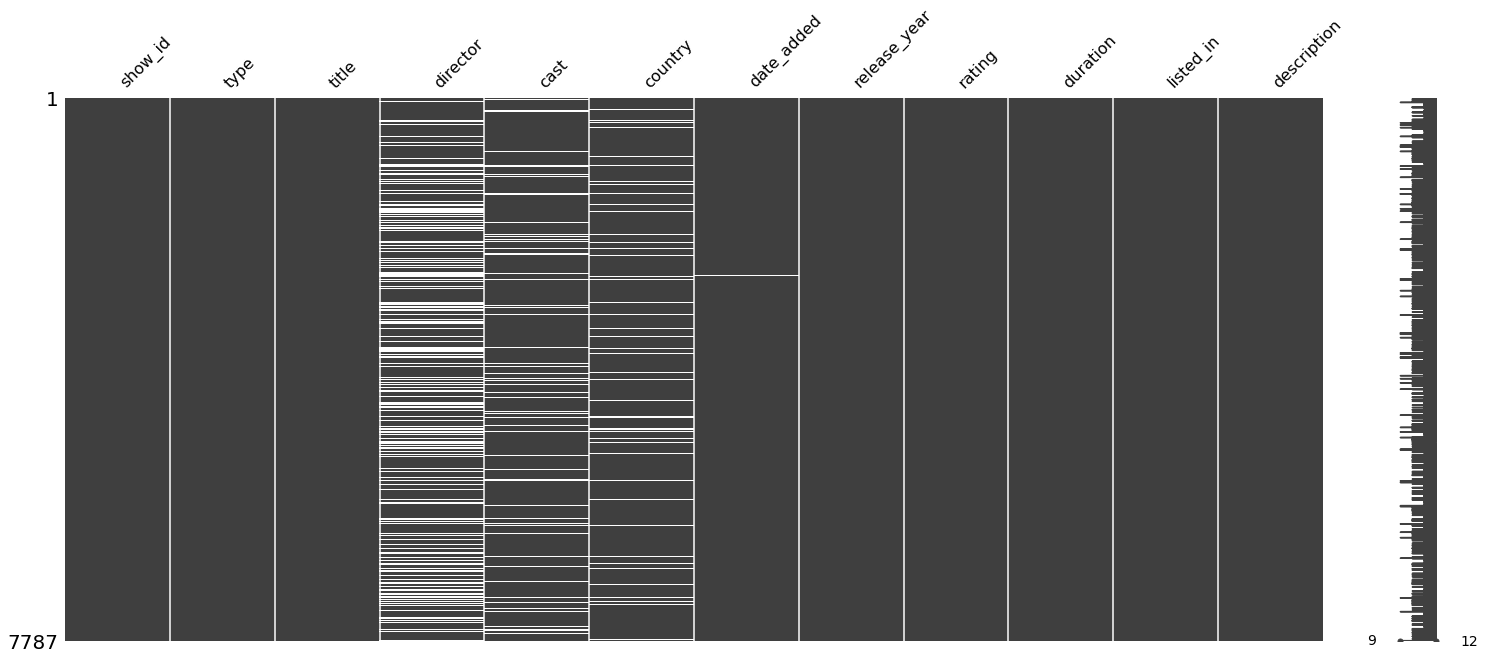

In [11]:
# MISSING VALUE VISUALISATION.
msno.matrix(df)
plt.show()

In [12]:
# TOTAL NULL VALUE COUNT.
df.isnull().sum().sum()

# In total, there are 3631 null values in this particular dataset.

3631

In [13]:
# DUPLICATE VALUE COUNT.
df.duplicated().sum()

# No duplicate values are present in the dataset.

0

In [14]:
# DATA DESCRIPTION.
df.describe(include='all')

# Except one, all other columns are actually categorical so most of them don't have any min, max or quantile values.
# oldest content released in the year 1925.
# 25% of the content was added by 2013.
# 50% of the content was added by 2017.
# 75% of the content was added by 2018.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [15]:
# COPYING DATA.
netflix_df = df.copy()

# Copying the dataset so as to keep the original dataset intact.

## **Data Cleaning & Pre-processing**

Dealing with the null values in "country" column.

In [16]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])

# Replacing null values in 'country' column with the mode (most common) country.

Dealing with the null values in 'cast' column.

In [17]:
netflix_df['cast'] = netflix_df['cast'].fillna('')

# Replacing null values in 'cast' column with empty string.

Dealing with the null values in 'director' column.

In [18]:
netflix_df['director'] = netflix_df['director'].fillna('')

# Replacing null values in 'director' column with empty string.

Dealing with the null values in 'date_added' column.

In [19]:
netflix_df['date_added'] = netflix_df['date_added'].fillna('')

# # Replacing null values in 'date_added' column with empty string.

In [20]:
# RE-CHECKING NULL VALUES.
netflix_df.isnull().sum()

# Only 7 of all the null values are present is left.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          7
duration        0
listed_in       0
description     0
dtype: int64

In [21]:
netflix_df.dropna(inplace = True)

# Removing those remaining null values from the dataset.

In [22]:
netflix_df.isnull().sum()

# Finally, no more null values are present in the dataset.

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [23]:
# CREATING NEW COLUMNS.
netflix_df['year_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[-1])
# Creating new column which will store only the years.

netflix_df['month_added'] = netflix_df['date_added'].apply(lambda x: x.split(" ")[0])
# Creating new column which will store only the months.

## **Exploratory Data Analysis (EDA)**

In [24]:
# TYPE OF CONTENT.
netflix_df['type'].value_counts()

# There are basically two types of content available : Movie & TV Shows.
# Total count of movies are 5372.
# Total count of TV shows are 2408.
# Clearly, movies are much more than tv shows in this dataset.

Movie      5372
TV Show    2408
Name: type, dtype: int64

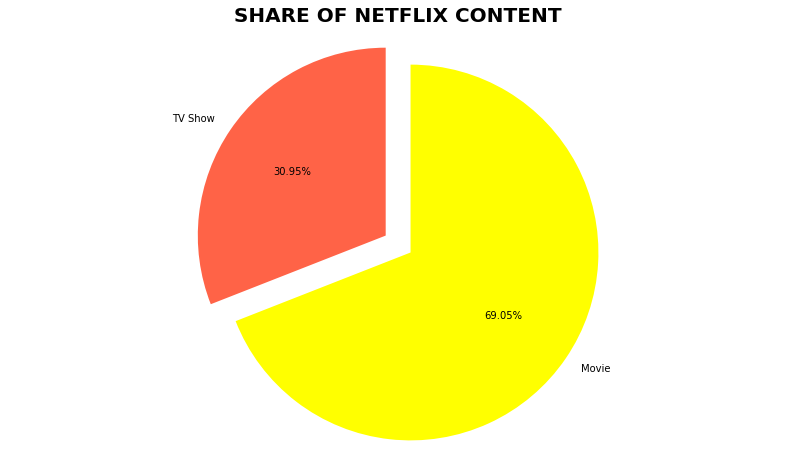

In [25]:
# PERCENTAGE SHARE OF CONTENT TYPE.
plt.figure(figsize=(14, 8))
labels=['TV Show', 'Movie']
plt.pie(netflix_df['type'].value_counts().sort_values(),labels=labels,explode=[0.08,0.08],
        autopct='%1.2f%%',colors=['tomato','yellow'], startangle=90)
plt.title('SHARE OF NETFLIX CONTENT',fontsize=20,fontweight='bold')
plt.axis('equal')
plt.show()

# 69.05% of total content are movies whereas only 30.95% of total content are TV shows.

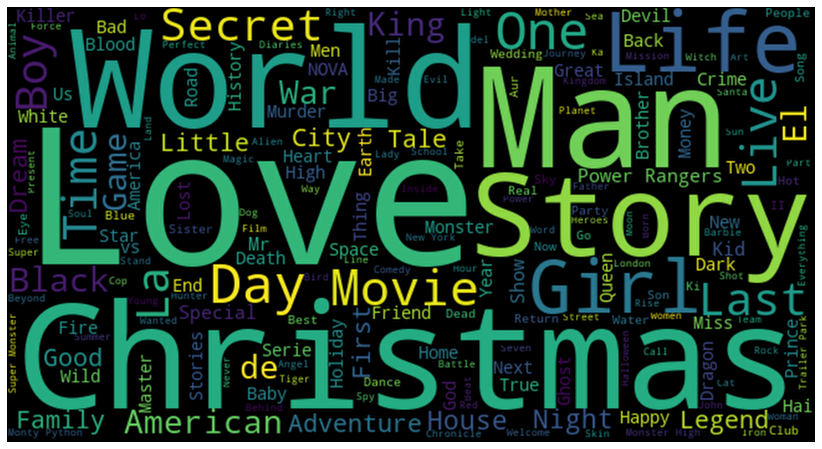

In [26]:
# ANALYSIS OF TITLES OF CONTENT.
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['title'])
stopwords = set(STOPWORDS)

title_cloud = WordCloud(stopwords=stopwords, background_color="black",width=650, height=350).generate(title_words)
plt.imshow(title_cloud, interpolation='bessel')
plt.axis("off")
plt.show()

# 'Christmas', 'Love', 'Man', 'World' are some of the most utilized words for movie titles.

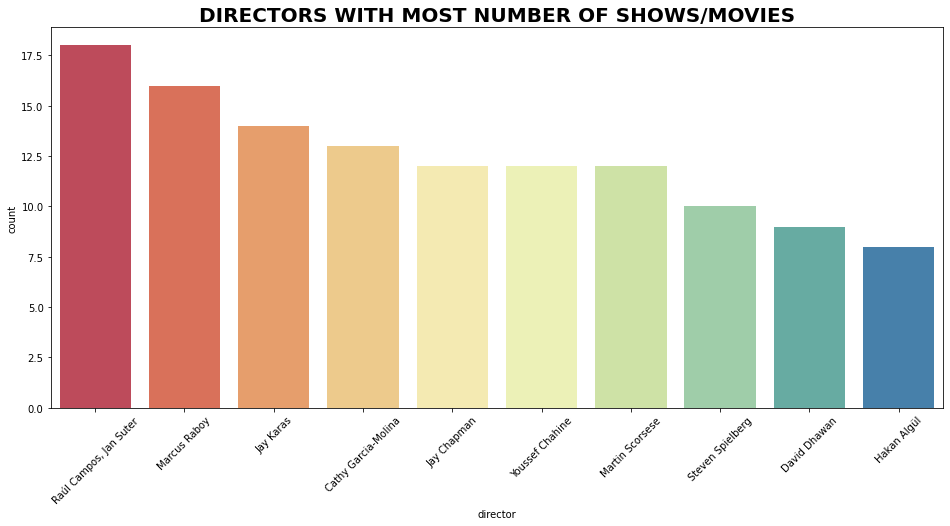

In [27]:
# ANALYSIS ON DIRECTORS.
plt.figure(figsize = (16,7))
netflix_directors =netflix_df[netflix_df['director'] != '']
sns.countplot(x='director',data=netflix_directors,order=netflix_directors.director.value_counts().head(10).index,palette='Spectral')
plt.title('DIRECTORS WITH MOST NUMBER OF SHOWS/MOVIES',fontsize=20,fontweight='bold')
plt.xticks(rotation = 45)
plt.show()

# 'Raul Campos and Jan Suter' have most number of contents in this particular dataset.

In [28]:
# COUNT OF COUNTRIES.
netflix_df['country'].value_counts()

# Need to pre-process a bit for better visualisation.

United States                                                   3058
India                                                            923
United Kingdom                                                   397
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [29]:
country_data = netflix_df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top5country = country_count.head(5)

# Pre-processed the data and is ready for visualisation.

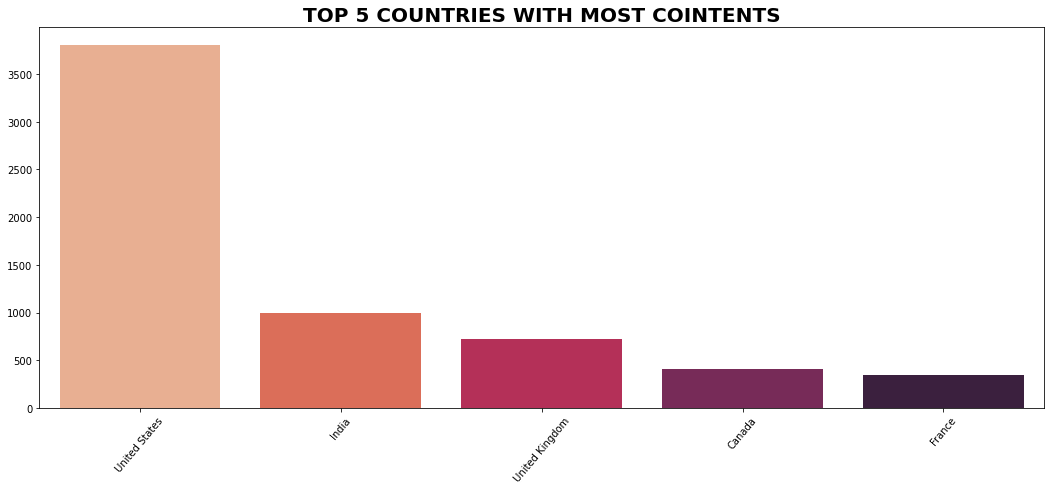

In [30]:
plt.figure(figsize=(18,7))
sns.barplot(x= top5country.index, y=top5country, palette='rocket_r')
plt.xticks(rotation=50)
plt.title('TOP 5 COUNTRIES WITH MOST COINTENTS', fontsize=20, fontweight='bold')
plt.show()

# Top 5 countries with most contents are 'United States', 'India', 'United Kingdom', 'Canada' and 'France'.
# However, 'United States' tops the list with maximum number of contents.

In [31]:
# SEGREGATING TV SHOWS & MOVIES DATA.
df_tv = netflix_df[netflix_df["type"] == "TV Show"]
df_movies = netflix_df[netflix_df["type"] == "Movie"]

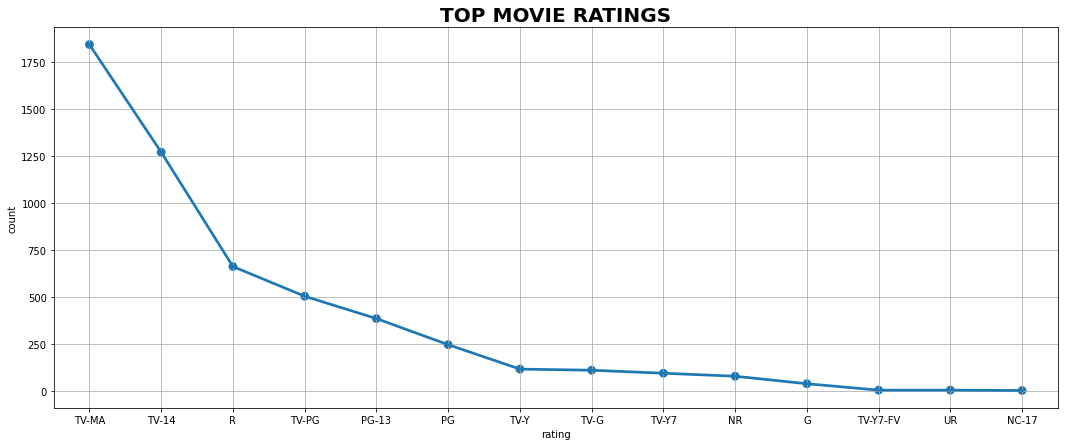

In [32]:
# ANALYSIS ON MOVIES.
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('TOP MOVIE RATINGS',fontsize=20, fontweight='bold')
plt.grid()
plt.show()

# Most of the movies are TV-MA rated.

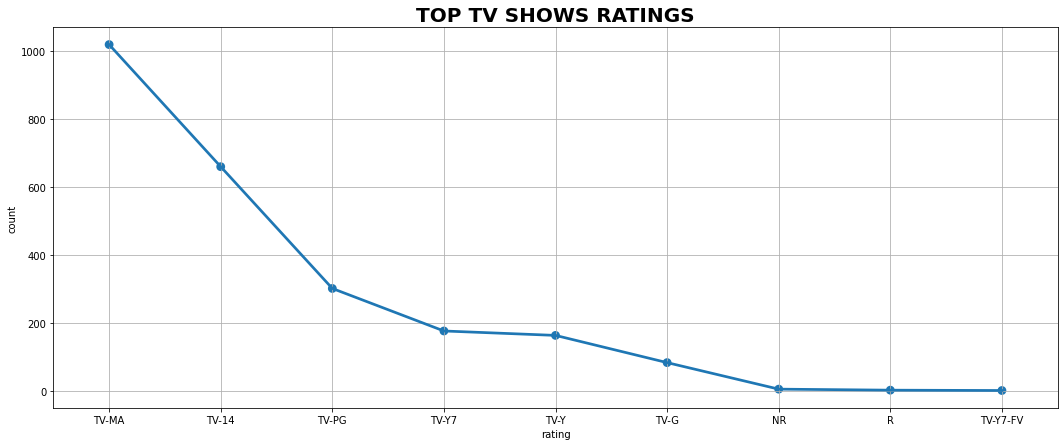

In [33]:
# ANALYSIS ON TV SHOWS.
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TOP TV SHOWS RATINGS',fontsize=20,fontweight='bold')
plt.grid()
plt.show()

# Most of the TV shows are TV-MA rated.

In [34]:
# ANALYSIS ON DIFFERENT RATINGS.
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
# List of all ratings of movies.

rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
# List of all ratings of TV shows.

movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)

def rating_barplot(data, title, height, h_lim=None):
  
  '''Function to plot the distribution of ratings for both TV shows and movies'''
  
  fig, ax = plt.subplots(1,1, figsize=(15, 7))
  if h_lim :
      ax.set_ylim(0, h_lim)
  ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')
  color =  ['green',  'blue',  'orange',  'red']
  span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

  for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
      ax.annotate(sub_title,
                  xy=(sum(span_range[idx])/2 ,height),
                  xytext=(0,0), textcoords='offset points',
                  va="center", ha="center",
                  color="w", fontsize=16, fontweight='bold',
                  bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
      ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)
      ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
  plt.show()

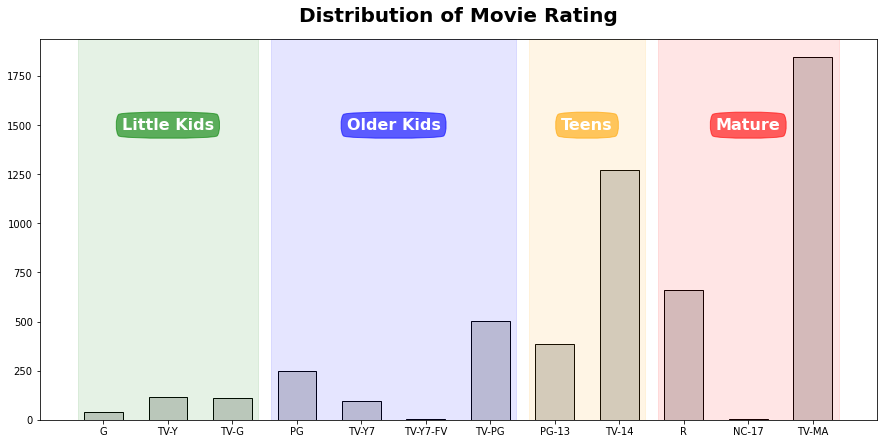

In [35]:
# MOVIE RATINGS.
rating_barplot(movie_rating,'Movie', 1500)

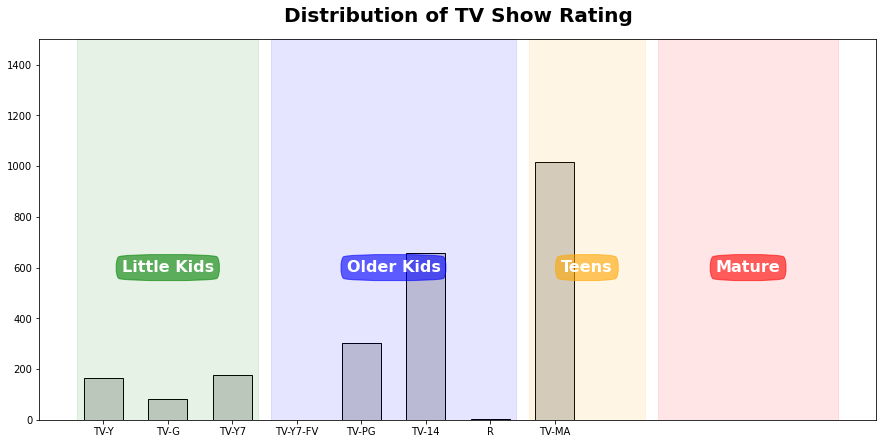

In [36]:
# TV SHOW RATINGS.
rating_barplot(tv_rating,'TV Show',600, 1500)

**TV-MA** :- This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17

**R**:- Restricted; Under 17 requires accompanying parent or adult guardian

**PG-13** :- Parents strongly cautioned; Some material may be inappropriate for children

**TV-14** :- This program may be unsuitable for children under 14 years of age

**TV-PG**:- This program contains material that parents may find unsuitable for younger children; Parental guidance is recommended

**NR** :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or  Unrated (UR) are often used.

**TV-G** :- This program is suitable for all ages

**TV-Y** :- This program is aimed at a very young audience, including children from ages 2–6

**TV-Y7** :- This program is most appropriate for children age 7 and up.

**PG** :- Parental guidance suggested

**G** :- All ages admitted; General audiences.

**NC-17** :- Adults Only; No One 17 and Under Admitted; Clearly adult; Children are not admitted

**TV-Y7-FV** :- Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category

**UR** :- If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or 

Unrated (UR) are often used.

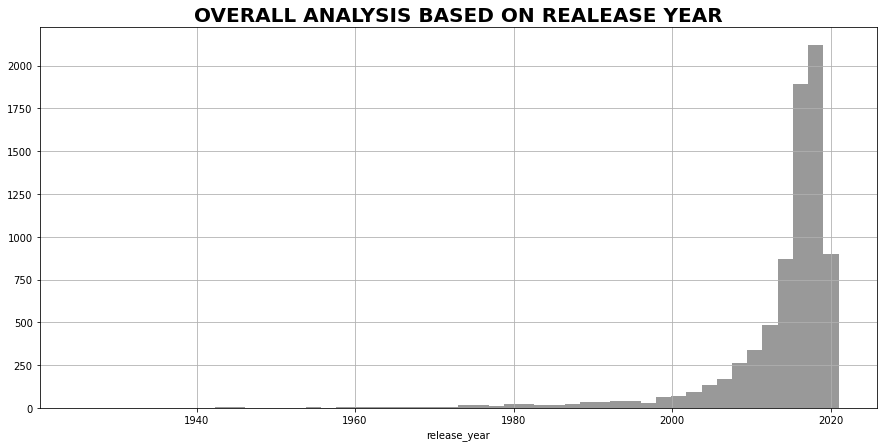

In [37]:
# ANALYSIS ON RELEASE YEAR.
plt.figure(figsize=(15,7))
sns.distplot(netflix_df["release_year"],kde=False, color="black")
plt.title('OVERALL ANALYSIS BASED ON REALEASE YEAR',fontsize=20,fontweight='bold')
plt.grid()
plt.show()

# Netflix database has most movies which were released during the last decade (2010 - 2020 ) compared to all other time periods.

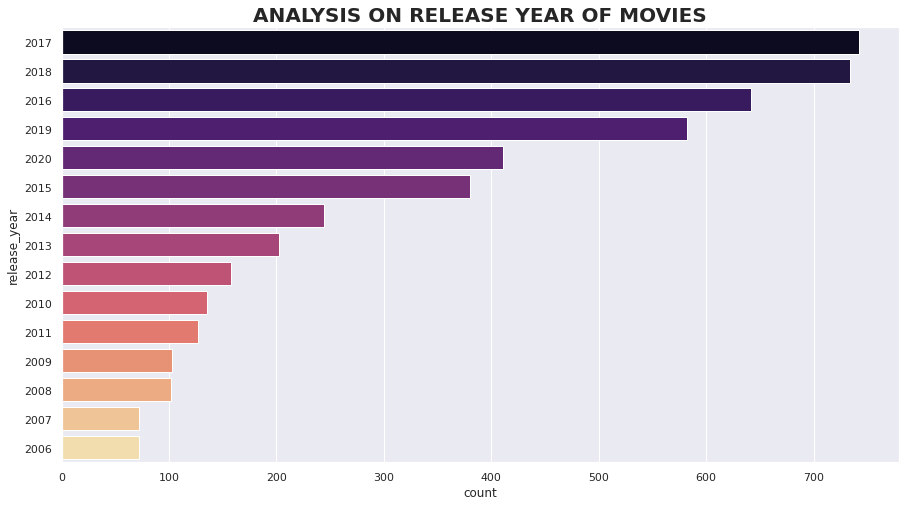

In [38]:
# ANALYSIS ON RELEASE YEAR OF MOVIES.
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_movies, palette="magma", order=df_movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF MOVIES', fontsize=20, fontweight='bold')
plt.show()

# Most of the movies were released in the year 2017 followed by 2018 and 2016.

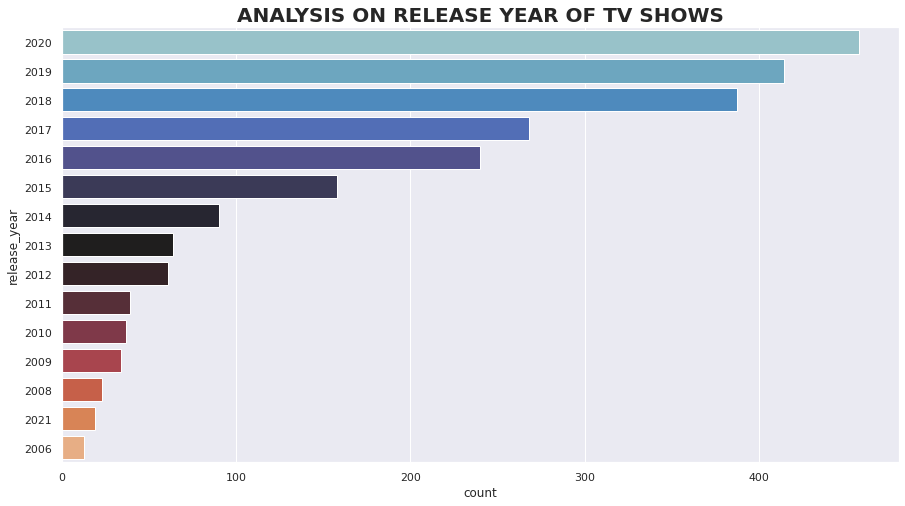

In [39]:
# ANALYSIS ON RELEASE YEAR OF TV SHOWS.
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df_tv, palette="icefire", order=df_tv['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR OF TV SHOWS', fontsize=20, fontweight='bold')
plt.show()

# Most of the TV Shows were released in 2020 followed by 2019 and 2018.

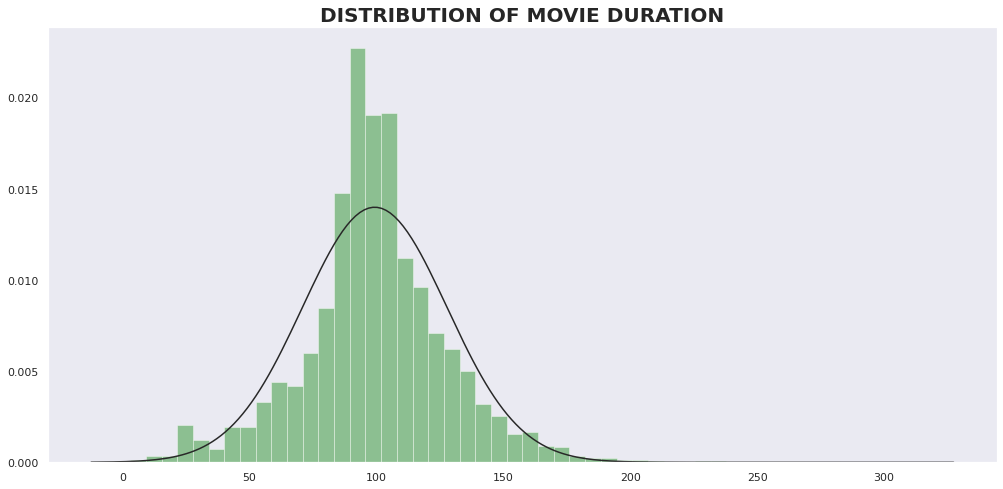

In [40]:
# ANALYSIS ON MOVIE DURATION.
plt.figure(figsize=(17,8))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['green'])
plt.title('DISTRIBUTION OF MOVIE DURATION',fontweight="bold",fontsize=20)
plt.grid()
plt.show()

# Shows a normal distribution.
# It is evident that majority of the movies have duration ranging from 85 min to 120 min.

In [41]:
# ANALYSIS ON TV SHOW DURATION.
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="DISTRIBUTION OF TV SHOWS DURATION",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

# Most of the streamed TV Shows have only one season.
# Most of the TV shows end by season 3.

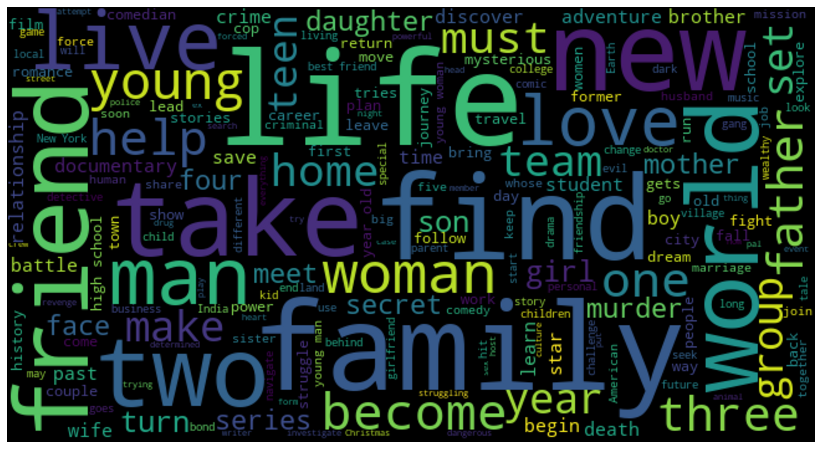

In [42]:
# ANALYSIS ON DESCRIPTION OF CONTENTS.
plt.figure(figsize= (16, 8))
title_words = " ".join(word for word in netflix_df['description'])
stopwords = set(STOPWORDS)

title_cloud = WordCloud(stopwords=stopwords, background_color="black",width=650, height=350).generate(title_words)
plt.imshow(title_cloud, interpolation='mitchell')
plt.axis("off")
plt.show()

# 'Family', 'life', 'find', 'friend' are some of the most utilized words in description.

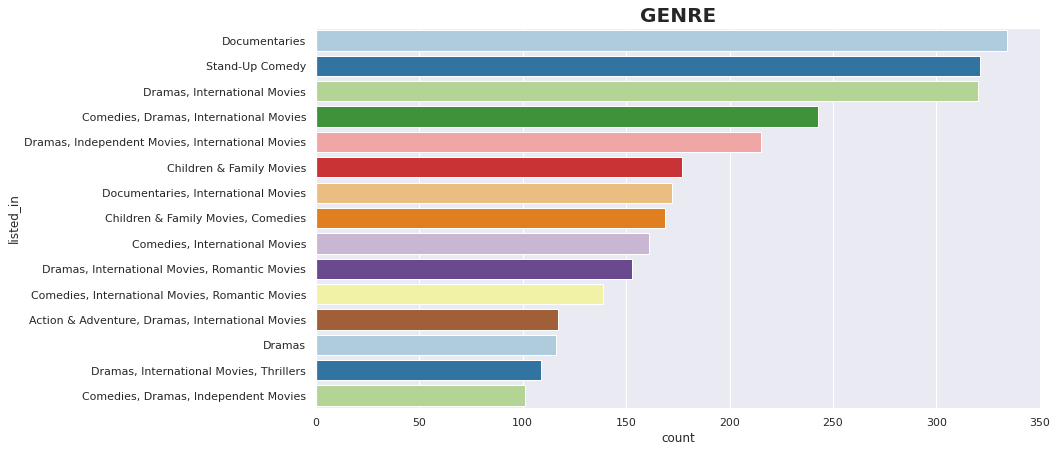

In [43]:
# ANALYSIS ON GENRE OF CONTENTS.
plt.figure(figsize = (13, 7))
sns.countplot(data = netflix_df, y = 'listed_in', palette = 'Paired', order = netflix_df[netflix_df['type'] == 'Movie']['listed_in'].value_counts().index[: 15])
plt.title('GENRE',fontsize=20,fontweight="bold")
plt.show()

# Most of the contents are basically documentaries.

In [44]:
# NETFLIX INDUSTRY OVER THE YEARS.
df_content = netflix_df['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_content['percent'] = df_content['count'].apply(lambda x : 100*x/sum(df_content['count']))
# Code for sorting the all over content.

df_tv1 = df_tv['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_tv1['percent'] = df_tv1['count'].apply(lambda x : 100*x/sum(df_tv1['count']))
# Code for sorting the TV shows.

df_movies1 = df_movies['year_added'].value_counts().reset_index().rename(columns = {
    'year_added' : 'count', 'index' : 'year_added'}).sort_values('year_added')
df_movies1['percent'] = df_movies1['count'].apply(lambda x : 100*x/sum(df_movies1['count']))
# Code for sorting the movies.

t1 = go.Scatter(x=df_movies1['year_added'], y=df_movies1["count"], name="Movies", marker=dict(color="blue"))
# Scatter plot code for plotting movies using plotly.
t2 = go.Scatter(x=df_tv1['year_added'], y=df_tv1["count"], name="TV Shows", marker=dict(color="magenta"))
# Scatter plot code for plotting TV shows using plotly.
t3 = go.Scatter(x=df_content['year_added'], y=df_content["count"], name="Total Contents", marker=dict(color="orange"))
# Scatter plot code for plotting total content using plotly.

data = [t1, t2, t3]

layout = go.Layout(title="CONTENT ADDED OVER THE YEARS", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

# The growth in number of movies on netflix is much higher than that of TV shows.
# The growth in content took a plunge from 2014 onwards.

## **DATA PREPARATION**

In [52]:
# COPYING DATA.
nf_df = df.copy()

# Copying original dataset into another new dataset for performing clustering and further machine learning operations.

In [53]:
# REPEATING SOME BASICS OPERATIONS.
nf_df["director"] = nf_df["director"].fillna("")
nf_df["cast"] = nf_df["cast"].fillna("")
nf_df["country"] = nf_df["country"].fillna("United States")
nf_df["date_added"] = nf_df["date_added"].fillna("")
nf_df["rating"] = nf_df["rating"].fillna("")

In [54]:
nf_df.cast = nf_df.cast.str.split(',')
nf_df.loc[:, 'cast'] = nf_df.cast.map(lambda x: x[0])

# Considering only the primary cast member for each record in the dataset.

In [55]:
nf_df.director = nf_df.director.str.split(',')
nf_df.loc[:, 'director'] = nf_df.director.map(lambda x: x[0])

# Considering only the primary director for each record in the dataset.

In [56]:
nf_df.country = nf_df.country.str.split(',')
nf_df.loc[:, 'country'] = nf_df.country.map(lambda x: x[0])

# Considering only the primary country for each record in the dataset.

In [57]:
nf_df["combined_text_feat"] = nf_df['listed_in'].astype(str) + " " + nf_df['description'].astype(str) + " " + nf_df['type'].astype(str) + " "  + nf_df['country'].astype(str)+" "

# Combining the features for vectorization purpose.

In [59]:
# IMPORTING SOME LIBRARIES USED FOR TEXT CLEANING.
from nltk.stem import PorterStemmer
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
stemmer = PorterStemmer()
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

In [61]:
# TEXT CLEANING.
def clean_text(inp_str):

    inp_str = inp_str.lower() 
    # Lowercasing the text.
    
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str) 
    # Replacing some of the symbols with space.
    
    inp_str = inp_str.replace('x', '') 
    # Removing the XXX values.
    
    inp_str = REMOVE_NUM.sub('', inp_str)
    # Removing blank spaces.
    
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str) 
    # Removing some of thhe symbols mentioned above from the text.
    
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    # Removing stopwords.
    
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))
    # Removing the words with less than 2 letters and more 21 letters.
    
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    # Stemming the words.
    
    return inp_str

In [62]:
nf_df["combined_text_feat"] = nf_df["combined_text_feat"].apply(clean_text)
nf_df["combined_text_feat"]

# Applying the above 'clean_text' function for text cleanup.

0       intern tv show tv drama tv scifi fantasi futur...
1       drama intern movi devast earthquak hit meico c...
2       horror movi intern movi armi recruit found dea...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama intern movi lebanon civil war depriv zoz...
7783    drama intern movi music music scrappi poor boy...
7784    documentari intern movi music music documentar...
7785    intern tv show realiti tv dessert wizard adria...
7786    documentari music music documentari delv mysti...
Name: combined_text_feat, Length: 7787, dtype: object

In [64]:
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(nf_df["combined_text_feat"])
pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()

# It helps in tokenizing documents, learn the vocabulary and inverse document frequency weightings, and allows to encode new documents.

,abandon,abduct,abil,aboard,absurd,abus,academi,accept,access,accid,accident,acclaim,account,accus,achiev,act,action,action adventur,actionpack,activ,activist,actor,actress,actual,ad,adam,adapt,addict,adjust,adolesc,adopt,ador,adult,adulthood,adventur,adventur anim,adventur children,adventur classic,adventur comedi,adventur drama,...,wood,word,work,work togeth,worker,world,world cup,world movi,world tv,world war,worst,wound,wreak,wreak havoc,wrestl,write,writer,wrong,year,year ago,year later,year movi,yearn,yearold,york,york citi,young,young boy,young coupl,young girl,young man,young men,young son,young woman,young women,younger,youth,zani,zealand,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140243,0.141597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.134161,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.167004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **K-Means Clustering**

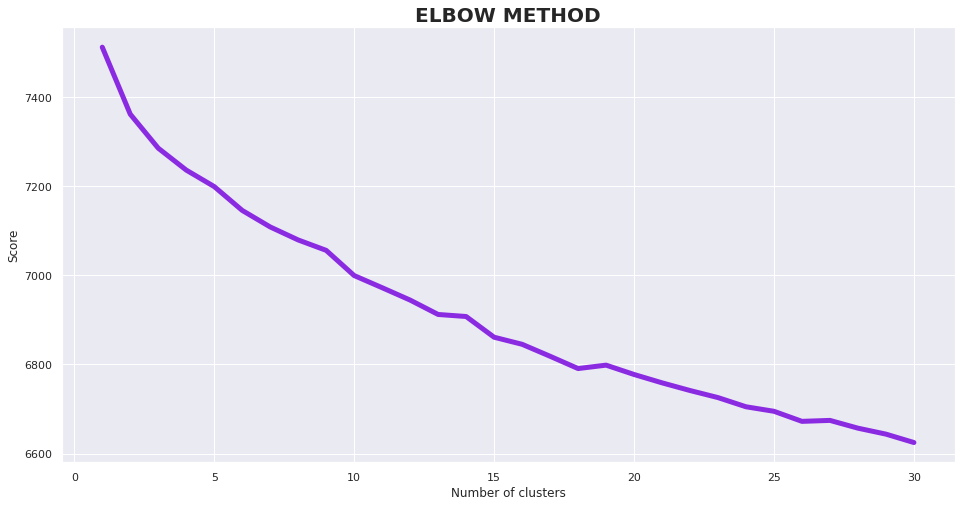

In [69]:
# ELBOW METHOD.
score = []
for i in range(1,31):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_vc)
    score.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,31 ),score,color='blueviolet',linewidth=5)
plt.title('ELBOW METHOD',fontsize=20,fontweight="bold")
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

# A heuristic used in determining the number of clusters in a data set.

In [70]:
# SILHOUTTE METHOD.
for n in range(2,30):
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(X_vc)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_vc, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n, score))

# Metric used for finding the optimal number of cluster.

For n_clusters = 2, silhouette score is 0.019278349875408655
For n_clusters = 3, silhouette score is 0.019815554937319124
For n_clusters = 4, silhouette score is 0.020357977564014283
For n_clusters = 5, silhouette score is 0.020817983900087562
For n_clusters = 6, silhouette score is 0.023253322493925286
For n_clusters = 7, silhouette score is 0.02446595309844223
For n_clusters = 8, silhouette score is 0.02091542598837487
For n_clusters = 9, silhouette score is 0.02171508737832578
For n_clusters = 10, silhouette score is 0.0242703383001131
For n_clusters = 11, silhouette score is 0.02307606780253504
For n_clusters = 12, silhouette score is 0.023704675270869485
For n_clusters = 13, silhouette score is 0.02651590773281663
For n_clusters = 14, silhouette score is 0.02720411748746973
For n_clusters = 15, silhouette score is 0.026453892120822588
For n_clusters = 16, silhouette score is 0.029338316095807598
For n_clusters = 17, silhouette score is 0.028413220492213485
For n_clusters = 18, sil

In [71]:
optimal_clusters = 27
model = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_vc)

# Performing k-means clustering using the optimal number of clusters.

KMeans(max_iter=600, n_clusters=27, random_state=0, tol=1e-06)

In [72]:
clusters = model.predict(X_vc)
score = silhouette_score(X_vc, clusters)
print("Silhouette score is {}".format(score))

# Evaluating the silhoutte score.

Silhouette score is 0.027657734521562234


In [73]:
nf_df["Clusters"] = clusters
nf_df.head()

# Adding new column to the dataset which stores the clusters.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_text_feat,Clusters
0,s1,TV Show,3%,,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...,22
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit meico c...,21
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,15
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",action adventur independ movi scifi fantasi po...,17
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,drama brilliant group student becom cardcount ...,13


## **Principal Component Analysis (PCA)**

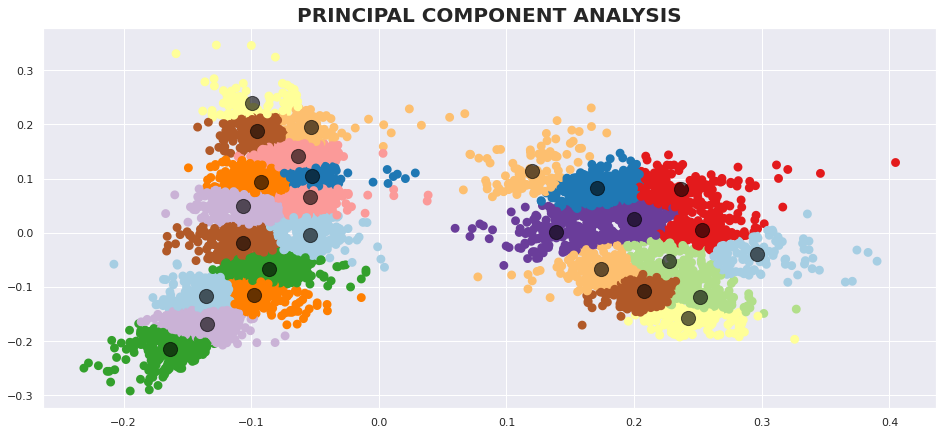

In [83]:
# APPLYING PCA.
pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=optimal_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(16, 7))
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=15, cmap='Paired', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6)
plt.title('PRINCIPAL COMPONENT ANALYSIS',fontsize=20,fontweight="bold")
plt.show()

# PCA is used for dimensionality reduction.

In [84]:
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

# Evaluating silhoutte score.

Silhouette score is 0.3561506233095743


In [86]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(optimal_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :optimal_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

# Difference between each cluster.

Cluster 0: romant movi romant comedi romant movi drama romant movi unit unit state unit state comedi drama date romanc love feel high relationship high school colleg school life live comedi drama decid new divorc unit kingdom
Cluster 1: famili movi children famili children famili movi movi comedi movi unit unit state state unit comedi movi drama save friend christma new monster movi canada help magic canada holiday young home drama school boy
Cluster 2: tv tv action adventur tv action action adventur adventur tv tv tv unit tv scifi tv drama scifi fantasi unit scifi unit state fantasi state intern tv crime crime tv drama tv comedi intern kid kid tv mysteri tv intern drama tv
Cluster 3: sport sport movi movi movi sport documentari documentari sport movi unit unit state unit state documentari intern intern movi team drama sport soccer player intern drama world athlet becom career basketbal movi documentari drama intern boer comedi sport
Cluster 4: tv korea tv south south korea south korea

In [88]:
nf_df['k-means_clusters'] = kmeans.labels_
nf_df.head(3)

# Adding a new column storing the K-MEANS clusters. 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_text_feat,Clusters,k-means_clusters
0,s1,TV Show,3%,,João Miguel,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,intern tv show tv drama tv scifi fantasi futur...,22,13
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,drama intern movi devast earthquak hit meico c...,21,7
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",horror movi intern movi armi recruit found dea...,15,7


## **Recommendation System**

In [ ]:
cosine_sim= linear_kernel(X_vc,X_vc)

# Computing cosine similarity matrix.

In [97]:
indices = pd.Series(nf_df.index,index=nf_df['title']).drop_duplicates()

# Series for getting the index and title.

In [98]:
def get_recommendations(title, cosine_sim = cosine_sim):

    idx = indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    sim_scores=sim_scores[1:11] 
    movie_indices = [i[0] for i in sim_scores]
    return nf_df['title'].iloc[movie_indices]

# Creating a function to get recommendations.

In [103]:
nf_df[150:160]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_text_feat,Clusters,k-means_clusters
150,s151,Movie,A Billion Colour Story,Padmakumar Narasimhamurthy,Dhruva Padmakumar,India,"April 1, 2018",2016,TV-14,104 min,"Dramas, Independent Movies, International Movies",The curious child of idealistic interfaith par...,drama independ movi intern movi curiou child i...,16,2
151,s152,Movie,A Boy Called Po,John Asher,Christopher Gorham,United States,"January 15, 2018",2016,PG,94 min,"Dramas, Sci-Fi & Fantasy","After his wife's death, an overworked engineer...",drama scifi fantasi wife death overwork engin ...,17,4
152,s153,TV Show,A Boy Name Flora A,,Crowd Lu,Taiwan,"September 1, 2017",2017,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",A 28-year-old layabout begins to re-examine hi...,intern tv show tv comedi tv drama yearold laya...,22,24
153,s154,Movie,A Bridge Too Far,Richard Attenborough,Dirk Bogarde,United States,"July 1, 2020",1977,PG,176 min,"Action & Adventure, Classic Movies, Dramas",This wartime drama details a pivotal day in 19...,action adventur classic movi drama wartim dram...,23,9
154,s155,Movie,A California Christmas,Shaun Paul Piccinino,Lauren Swickard,United States,"December 14, 2020",2020,PG-13,107 min,"Comedies, Romantic Movies","With his carefree lifestyle on the line, a wea...",comedi romant movi carefre lifestyl line wealt...,0,17
155,s156,Movie,A Champion Heart,David de Vos,Mandy Grace,United States,"April 14, 2020",2018,G,90 min,"Children & Family Movies, Dramas",When a grieving teen must work off her debt to...,children famili movi drama griev teen must wor...,1,10
156,s157,Movie,A Chaster Marriage,Umut Kirca,Emre Karayel,Turkey,"October 2, 2020",2016,TV-14,94 min,"Comedies, International Movies, Romantic Movies","Forced to wed his childhood friend, a man obse...",comedi intern movi romant movi forc wed childh...,5,19
157,s158,Movie,A Choo,Kevin Ko,Kai Ko,Taiwan,"October 14, 2020",2020,TV-14,101 min,"Action & Adventure, International Movies, Roma...",Determined to win the heart of his childhood c...,action adventur intern movi romant movi determ...,5,16
158,s159,Movie,A Christmas Catch,,Emily Alatalo,Canada,"November 4, 2020",2018,TV-G,87 min,"Dramas, Romantic Movies",A cop working undercover to trail a possible d...,drama romant movi cop work undercov trail poss...,0,7
159,s160,Movie,A Christmas Prince,Alex Zamm,Rose McIver,United States,"November 17, 2017",2017,TV-PG,92 min,"Children & Family Movies, Dramas, Romantic Movies",Christmas comes early for an aspiring young jo...,children famili movi drama romant movi christm...,1,17


In [108]:
get_recommendations('A Bridge Too Far')

# Checking the recommendation system using a random movie title.

5430        Schindler's List
7538    Westerplatte Resists
381      Alexandria ... Why?
7132             Tokyo Trial
4879                 Platoon
1041        Bonnie and Clyde
6423          The Great Raid
4300    Mutiny on the Bounty
6699       The Negro Soldier
1685                Defiance
Name: title, dtype: object